# Natural Language Generation

# GRU
The GRU is like a long short-term memory (LSTM) with forget gate but has fewer parameters than LSTM, as it lacks an output gate

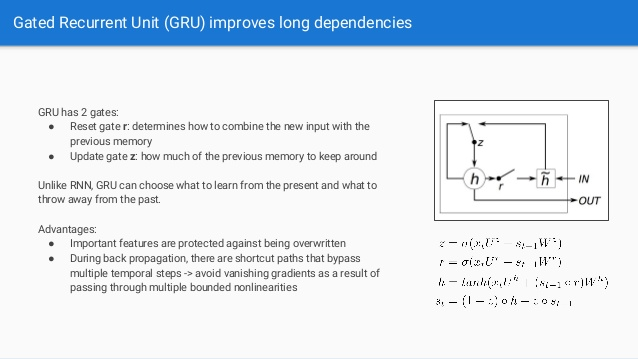

In [1]:
from IPython.display import Image
Image(filename='GRUjpg.jpg')

# 1)-Import key modules

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, SimpleRNN, GRU
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

Using TensorFlow backend.


# 2)-Loading data

I have used Sherlock Homes book from net as text file to generate data. It could be a good excercise since I am not very active in writing so, I ll set an NLG model to do it for me

In [3]:
text = open('sherlock_homes.txt', 'r').read()

# 3) Checking data and setting parameters for modeling

In [4]:
hidden_nodes = 128
batch_size = 256
file = text
maxlen = 200
step = 3

In [5]:
type(text)

str

In [6]:
chars = sorted(list(set(text)))

In [7]:
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [8]:
# build a sequence for every <config.step>-th character in the text

sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

In [9]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# 4)- Building Modeling

In [10]:
model = Sequential()
model.add(GRU(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="rmsprop")

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 85)                10965     
Total params: 93,141
Trainable params: 93,141
Non-trainable params: 0
_________________________________________________________________


In [12]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [13]:
class SampleText(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs={}):
        start_index = random.randint(0, len(text) - maxlen - 1)

        for diversity in [0.5, 1.2]:
            print()
            print('----- diversity:', diversity)

            generated = ''
            sentence = text[start_index: start_index + maxlen]
            generated += sentence
            print('----- Generating with seed: "' + sentence + '"')
            sys.stdout.write(generated)

            for i in range(200):
                x_pred = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(sentence):
                    x_pred[0, t, char_indices[char]] = 1.

                preds = model.predict(x_pred, verbose=0)[0]
                next_index = sample(preds, diversity)
                next_char = indices_char[next_index]

                generated += next_char
                sentence = sentence[1:] + next_char

                sys.stdout.write(next_char)
                sys.stdout.flush()
            print()

In [14]:
# due to large text size, I am keeping epochs to 4
model.fit(x, y, batch_size=batch_size,epochs=4,callbacks=[SampleText()])

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
187218/187218 [==============================] - 347s 2ms/step - loss: 2.5181

----- diversity: 0.5
----- Generating with seed: "nd still screamed and the rain splashed and pattered
against the windows. This strange, wild story seemed to have come
to us from amid the mad elements--blown in upon us like a sheet
of sea-weed in a "
nd still screamed and the rain splashed and pattered
against the windows. This strange, wild story seemed to have come
to us from amid the mad elements--blown in upon us like a sheet
of sea-weed in a matqued in has of wome his ay ore hat the fourt me that heoun to ham in that the inge sare."

"I meer and and fille beela fowathe ficmed ars at mathin what what ind at and of hat ald as and had
hat he

----- diversity: 1.2
----- Generating with seed: "nd still screamed and the rain splashed and pattered
against the windows. This strange, wild story seemed to have come
to us from amid the mad elements--blown 